In [131]:
print("size of X", X.shape)

size of X (442, 10)


In [132]:
print("size of y", y.shape)

size of y (442,)


In [133]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [134]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [136]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [137]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.reshape(-1,1)).flatten()
y_test_scaled = scaler.transform(y_test.reshape(-1,1)).flatten()

In [139]:
epochs = 50000
learning_rate = 0.0001
n = X_train.shape[1] # 10
b = 0 # initialising to 0
w = np.zeros(n)  # initialising to 0


### Final Derivatives

$$
\frac{\partial J}{\partial m} = -2 \sum_{i=1}^n x_i \cdot \left( y_i - (mx_i + c) \right)
$$

$$
\frac{\partial J}{\partial c} = -2 \sum_{i=1}^n \left( y_i - (mx_i + c) \right)
$$

* Repeatedly update:

  $$
  m := m - \alpha \cdot \frac{\partial J}{\partial m}
  $$

  $$
  c := c - \alpha \cdot \frac{\partial J}{\partial c}
  $$
* Where $\alpha$ is the **learning rate** (a small number like 0.01)





In [140]:
losses = []
# gradient descent 
for epoch in range(epochs):
    y_pred_scaled = X_train_scaled.dot(w) + b

    error = y_train_scaled - y_pred_scaled  # true - predict

    dw = (1/len(X_train)) * np.sum(X_train_scaled.T.dot(error))   # parameter m
    db = (1/len(X_train)) * np.sum(error) # parameter c

    # update weights 
    w -= learning_rate * dw
    b -= learning_rate * db
    mse = np.mean(error **2)
    losses.append(mse)
    
    

In [141]:
y_pred_scaled_test = X_test_scaled.dot(w) +b 


In [142]:
y_pred_descaled = scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()


In [143]:
test_mse = np.mean((y_pred_scaled_test - y_test)**2)

In [144]:
y_test.shape; y_pred_scaled_test.shape

(89,)

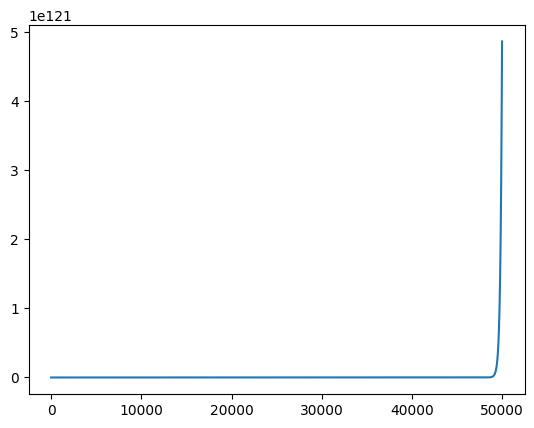

In [145]:
plt.plot(losses)
plt.show()

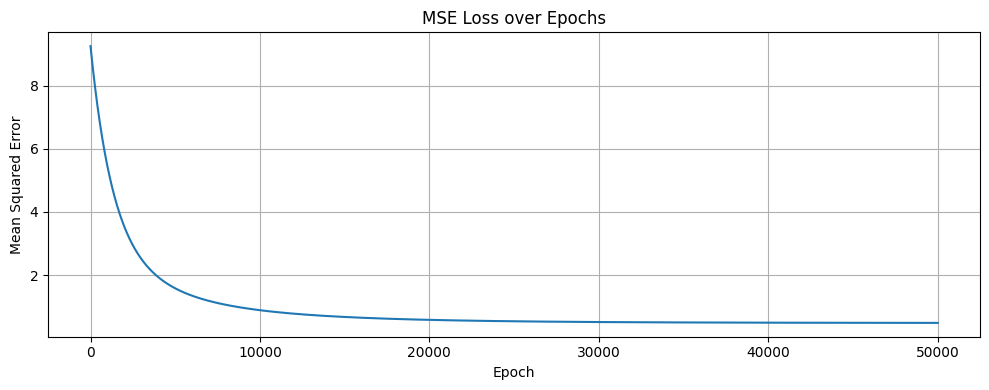

In [154]:
data = load_diabetes()
X = data.data 
y = data.target

In [163]:
X_mean = np.mean(X, axis = 0)

In [164]:
(X[:,i] - X_mean[i]) / np.std(X,axis = 0)

array([ 0.03807591, -0.00188202,  0.08529891, -0.08906294,  0.00538306,
       -0.09269548, -0.04547248,  0.06350368,  0.04170844, -0.07090025,
       -0.09632802,  0.02717829,  0.01628068,  0.00538306,  0.04534098,
       -0.05273755, -0.00551455,  0.07076875, -0.0382074 , -0.02730979,
       -0.04910502, -0.0854304 , -0.0854304 ,  0.04534098, -0.06363517,
       -0.06726771, -0.10722563, -0.02367725,  0.05260606,  0.06713621,
       -0.06000263, -0.02367725,  0.03444337,  0.03081083,  0.01628068,
        0.04897352,  0.01264814, -0.00914709, -0.00188202, -0.00188202,
        0.00538306, -0.09996055, -0.06000263,  0.01991321,  0.04534098,
        0.02717829, -0.05637009, -0.07816532,  0.06713621, -0.04183994,
        0.03444337,  0.05987114, -0.05273755, -0.00914709, -0.04910502,
       -0.04183994, -0.04183994, -0.02730979,  0.04170844,  0.06350368,
       -0.07090025, -0.04183994, -0.02730979, -0.03457486,  0.06713621,
       -0.04547248, -0.00914709,  0.04170844,  0.03807591,  0.01